In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
model_path = '/users/Stathis/GoogleDrive/MLP/'
nets =  list(filter(lambda x: os.path.isdir(os.path.join(model_path, x)), os.listdir(model_path)))
nets = [a for a in nets if 'resnet56' in a  or 'densenet121' in a]
nets.sort()
nets

['densenet121_cifar10',
 'densenet121_cifar100',
 'densenet121_cifar100_fgsm',
 'densenet121_cifar100_pgd',
 'densenet121_cifar10_fgsm',
 'densenet121_cifar10_pgd',
 'resnet56_cifar10',
 'resnet56_cifar100',
 'resnet56_cifar100_fgsm',
 'resnet56_cifar100_fgsm_2',
 'resnet56_cifar100_pgd',
 'resnet56_cifar100_pgd_2',
 'resnet56_cifar10_fgsm',
 'resnet56_cifar10_fgsm_2',
 'resnet56_cifar10_pgd',
 'resnet56_cifar10_pgd_2']

In [3]:
summaries = {}
test_results ={}
for net in nets:
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    summaries[net] = data_train
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_results[net] = data_train

In [4]:
model_path = '/users/Stathis/GoogleDrive/MLP/transfer/'
transfer_nets =  list(filter(lambda x: os.path.isdir(os.path.join(model_path, x)), os.listdir(model_path)))
transfer_nets = [a for a in transfer_nets if 'resnet56' in a  or 'densenet121' in a]
transfer_nets.sort()
transfer_nets

['transfer_densenet121_cifar100_to_cifar10',
 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_5_layers',
 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_6_layers',
 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_7_layers',
 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_all_layers',
 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_last_layer',
 'transfer_resnet56_cifar100_to_cifar10',
 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_5_layers',
 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_6_layers',
 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_7_layers',
 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_all_layers',
 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_last_layer']

In [11]:
summaries_transfer = {}
test_results_transfer ={}
for net in transfer_nets:
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    summaries_transfer[net] = data_train
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_results_transfer[net] = data_train

In [12]:
summaries_transfer.keys()

dict_keys(['transfer_densenet121_cifar100_to_cifar10', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_5_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_6_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_7_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_all_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_last_layer', 'transfer_resnet56_cifar100_to_cifar10', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_5_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_6_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_7_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_all_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_last_layer'])

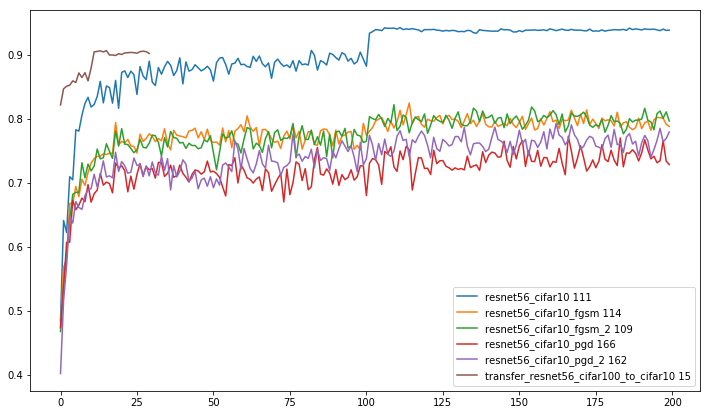

In [13]:
model='resnet56'
plt.figure(figsize=(12,7))
for net in nets:
    if '%s_cifar10' % model in net and not '%s_cifar100' % model in net:
        argmx = summaries[net]['val_acc'][:200].idxmax()
        summaries[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
net='transfer_%s_cifar100_to_cifar10' % model
argmx = summaries_transfer[net]['val_acc'][:200].idxmax()
summaries_transfer[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
plt.legend()
plt.show()

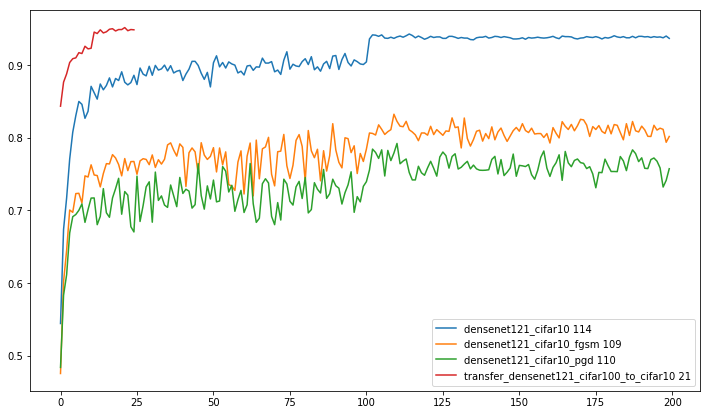

In [14]:
model='densenet121'
plt.figure(figsize=(12,7))
for net in nets:
    if '%s_cifar10' % model in net and not '%s_cifar100' % model in net:
        argmx = summaries[net]['val_acc'][:200].idxmax()
        summaries[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
net='transfer_%s_cifar100_to_cifar10' % model
argmx = summaries_transfer[net]['val_acc'][:200].idxmax()
summaries_transfer[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
plt.legend()
plt.show()

In [16]:
summaries_transfer.keys()

dict_keys(['transfer_densenet121_cifar100_to_cifar10', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_5_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_6_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_7_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_all_layers', 'transfer_densenet121_cifar100_to_cifar10_lr_0.10000_last_layer', 'transfer_resnet56_cifar100_to_cifar10', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_5_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_6_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_7_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_all_layers', 'transfer_resnet56_cifar100_to_cifar10_lr_0.10000_last_layer'])

In [25]:
'densenet' in 'transfer_densenet121_cifar100_to_cifar10'

True

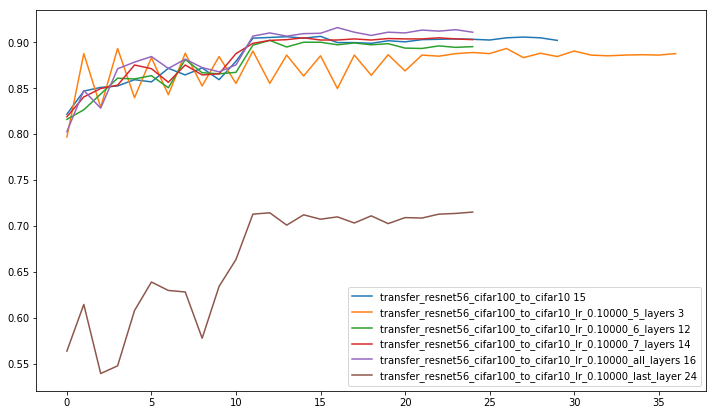

In [34]:
model='resnet56'
plt.figure(figsize=(12,7))
for net in transfer_nets:
    if model in net:
        argmx = summaries_transfer[net]['val_acc'][:200].idxmax()
        summaries_transfer[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
net='resnet56_cifar10'
argmx = summaries[net]['val_acc'][:200].idxmax()
# summaries[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
plt.legend()
plt.show()

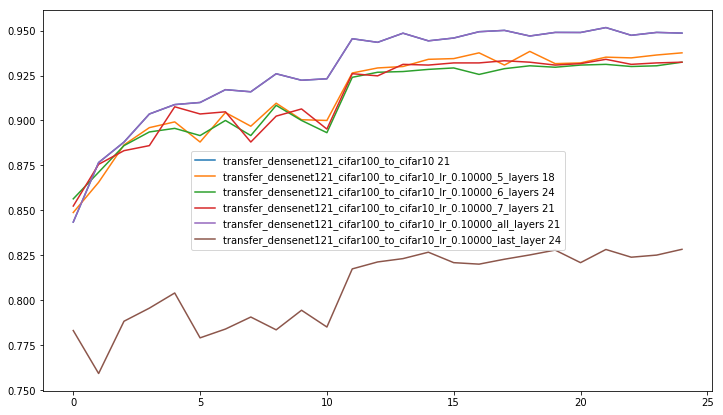

In [35]:
model='densenet121'
plt.figure(figsize=(12,7))
for net in transfer_nets:
    if model in net:
        argmx = summaries_transfer[net]['val_acc'][:200].idxmax()
        summaries_transfer[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
plt.legend()
plt.show()